# Agent Experimentation
The goal here is to examine insights against agent behaviour and knowledge across different different score distributions and strategies.

In [ ]:
from main import AppConfig, NimbyAgent
from src.clients import AnthropicClient
from src.processors.repd_processor import REPDProcessor
import matplotlib.pyplot as plt



In [2]:
cfg = AppConfig
client_haiku = AnthropicClient(api_key=cfg.api_key, temperature=1, model="claude-haiku-4-5")
client_creative = AnthropicClient(api_key=cfg.api_key, temperature=1)
client_basic = AnthropicClient(api_key=cfg.api_key, temperature=0.2)
processor = REPDProcessor()
agent_haiku = NimbyAgent(client=client_creative, processor=processor)

agent = NimbyAgent(client=client_creative, processor=processor)
agent_base = NimbyAgent(client=client_basic, processor=processor)

In [4]:
message_haiku = agent_haiku.run(max_values=8)
messages = agent_base.run(max_values=8)
messages_base = agent.run(max_values=8)


In [5]:
creative_scores  = [o.nimby_score for _, o in messages]
creative_cert    = [o.certainty for _, o in messages]

base_scores = [o.nimby_score for _, o in messages_base]
base_cert = [o.certainty for _, o in messages_base]

haiku_scores = [o.nimby_score for _, o in message_haiku]
haiku_cert = [o.certainty for _, o in message_haiku]

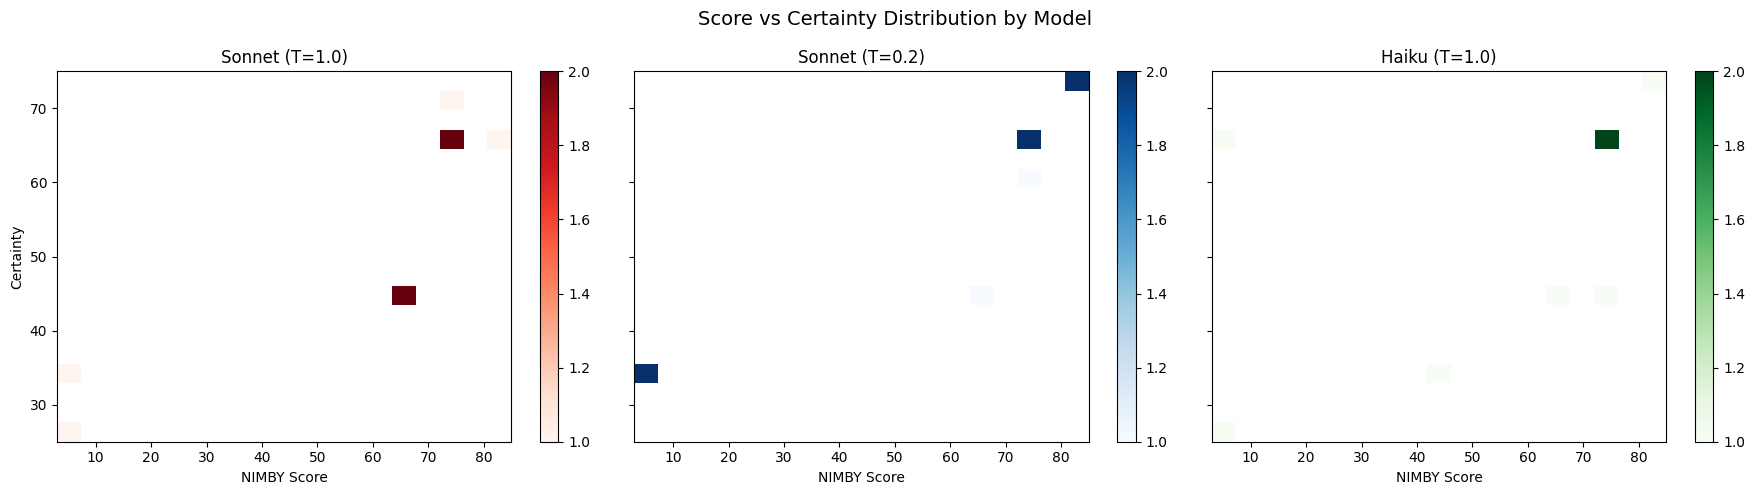

In [6]:
import numpy as np

fig, axes = plt.subplots(1, 3, figsize=(18, 5), sharey=True)

datasets = [
    (creative_scores, creative_cert, 'Sonnet (T=1.0)', 'Reds'),
    (base_scores, base_cert, 'Sonnet (T=0.2)', 'Blues'),
    (haiku_scores, haiku_cert, 'Haiku (T=1.0)', 'Greens'),
]

# Use consistent bin edges across all three
all_scores = creative_scores + base_scores + haiku_scores
all_cert = creative_cert + base_cert + haiku_cert
x_bins = np.linspace(min(all_scores), max(all_scores), 20)
y_bins = np.linspace(min(all_cert), max(all_cert), 20)

for ax, (scores, cert, title, cmap) in zip(axes, datasets):
    h = ax.hist2d(scores, cert, bins=[x_bins, y_bins], cmap=cmap, cmin=0.5)
    ax.set_title(title)
    ax.set_xlabel('NIMBY Score')
    fig.colorbar(h[3], ax=ax)

axes[0].set_ylabel('Certainty')
fig.suptitle('Score vs Certainty Distribution by Model', fontsize=14)
fig.tight_layout()
